In [ ]:
# todo normalization

In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn import preprocessing
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.metrics import *

# file1 = 'D:/PYworks/MaveV20/mave/data/12.csv'
EnFile = 'D:/WORKS/BEAR WORKS/100EnerNOCCommercialBuildings/csv/12.csv'
# dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d %H:%M')
# Chw05_Rm26 = pd.read_csv(file1, parse_dates = ['Date'], date_parser=dateparse, header=0)

EnOriTable = pd.read_csv(EnFile, header=0)
EnOriTable.index = pd.to_datetime(EnOriTable['dttm_utc'])
EnOriTable.dttm_utc = pd.to_datetime(EnOriTable.dttm_utc).dt.strftime('%m/%d/%Y %H:%M')
EnOriTable

,timestamp,dttm_utc,value,estimated,anomaly
dttm_utc,,,,,
2012-01-01 00:05:00,1325376300,01/01/2012 00:05,27.0053,0,NaN
2012-01-01 00:10:00,1325376600,01/01/2012 00:10,25.0049,0,NaN
2012-01-01 00:15:00,1325376900,01/01/2012 00:15,26.0051,0,NaN
2012-01-01 00:20:00,1325377200,01/01/2012 00:20,25.0049,0,NaN
2012-01-01 00:25:00,1325377500,01/01/2012 00:25,27.0053,0,NaN
2012-01-01 00:30:00,1325377800,01/01/2012 00:30,25.0049,0,NaN
2012-01-01 00:35:00,1325378100,01/01/2012 00:35,27.0053,0,NaN
2012-01-01 00:40:00,1325378400,01/01/2012 00:40,25.0049,0,NaN
2012-01-01 00:45:00,1325378700,01/01/2012 00:45,26.0051,0,NaN


In [32]:
# test the function of numpy 'where' and index. better to use pandas index
EnOriTable.index.get_loc('2012-12-31 23:45:00')
EnOri = EnOriTable.values
a = (np.where(EnOri==u'01/01/2012 00:15'))[0][0]
# a[0]
aa = EnOri[:a]
bb = EnOriTable.iloc[a]
# aa = EnOri[np.where(EnOri==u'01/01/2012 00:15')[0]:]
# print a[1][0]
# print len(a)
print a
print aa
print bb

2
[[1325376300L u'01/01/2012 00:05' 27.0053 0L nan]
 [1325376600L u'01/01/2012 00:10' 25.0049 0L nan]]
timestamp          1325376900
dttm_utc     01/01/2012 00:15
value                 26.0051
estimated                   0
anomaly                   NaN
Name: 2012-01-01 00:15:00, dtype: object


In [3]:
WeaFile = 'D:/WORKS\BEAR WORKS/100EnerNOCCommercialBuildings/weather/NY.csv'
WeaOriTable = pd.read_csv(WeaFile, header=0)
WeaOriTable.index = pd.to_datetime(WeaOriTable['DateTime'])
WeaOriTable

,DateTime,Temp,RelHum
DateTime,,,
2012-01-01 03:00:00,2012/1/1 3:00,5.6,0.95
2012-01-01 09:00:00,2012/1/1 9:00,5.6,0.88
2012-01-01 15:00:00,2012/1/1 15:00,8.9,0.76
2012-01-01 21:00:00,2012/1/1 21:00,7.8,0.85
2012-01-02 03:00:00,2012/1/2 3:00,7.8,0.95
2012-01-02 09:00:00,2012/1/2 9:00,10.0,0.92
2012-01-02 15:00:00,2012/1/2 15:00,8.3,0.51
2012-01-02 21:00:00,2012/1/2 21:00,5.0,0.50
2012-01-03 03:00:00,2012/1/3 3:00,4.4,0.44


In [ ]:
# WeaOriTable.DateTime = pd.to_datetime(EnOriTable.dttm_utc).dt.strftime('%m/%d/%Y %H:%M')
Wea5mTable = WeaOriTable.resample(rule='5T',label='right',closed='right').asfreq().interpolate(method='linear')
Wea5mTable

In [4]:
# use the timestep of the weather data
X = WeaOriTable['Temp'].values.reshape(-1, 1)
y = EnOriTable.loc[WeaOriTable.index]['value'].values.reshape(-1, 1)


[[ 5.6    25.0049]
 [ 5.6    25.0049]
 [ 8.9    27.0053]
 ...
 [-3.3    24.0047]
 [ 1.1    39.0077]
 [ 1.1    37.0073]]


[[ 5.6]
 [ 5.6]
 [ 8.9]
 [ 7.8]
 [ 7.8]
 [10. ]
 [ 8.3]
 [ 5. ]
 [ 4.4]
 [ 1.1]
 [ 1.1]
 [-1.7]
 [-5. ]
 [-7.8]
 [-6.7]
 [-4.4]
 [ 1.7]
 [ 0. ]
 [ 1.1]
 [ 2.8]
 [ 1.7]
 [ 0. ]
 [ 3.9]
 [ 8.9]
 [ 8.3]
 [ 6.1]
 [10.6]
 [ 8.9]
 [ 8.3]
 [ 5. ]
 [ 6.7]
 [ 5.6]
 [ 2.2]
 [ 0.6]
 [ 1.7]
 [ 1.7]
 [ 2.8]
 [ 5. ]
 [ 5.6]
 [ 6.1]
 [ 3.9]
 [ 2.2]
 [ 5. ]
 [ 4.4]
 [ 5. ]
 [ 5.6]
 [ 7.8]
 [10. ]
 [ 6.7]
 [ 6.1]
 [10.6]
 [ 5. ]
 [ 1.1]
 [ 1.7]
 [ 1.1]
 [ 1.7]
 [-1.7]
 [-5.6]
 [-8.9]
 [-7.2]
 [-8.9]
 [-7.8]
 [-3.9]
 [-1.1]
 [ 5.6]
 [ 6.7]
 [ 7.2]
 [ 6.7]
 [ 8.9]
 [ 8.9]
 [ 6.7]
 [ 2.8]
 [-1.7]
 [-2.8]
 [-0.6]
 [ 0. ]
 [ 2.8]
 [ 1.1]
 [ 1.7]
 [ 0. ]
 [-1.7]
 [-2.2]
 [ 0. ]
 [ 0.6]
 [ 1.7]
 [-0.6]
 [ 0. ]
 [ 0.6]
 [ 1.1]
 [ 3.3]
 [ 5. ]
 [ 7.8]
 [ 8.3]
 [ 8.9]
 [ 8.3]
 [ 7.2]
 [ 6.1]
 [ 4.4]
 [ 5.6]
 [ 5. ]
 [ 2.8]
 [ 2.2]
 [ 3.3]
 [ 3.3]
 [ 5.6]
 [ 7.2]
 [10. ]
 [10. ]
 [ 6.7]
 [ 4.4]
 [ 6.7]
 [ 5.6]
 [ 6.1]
 [ 5. ]
 [ 5. ]
 [ 3.9]
 [ 4.4]
 [ 5. ]
 [ 4.4]
 [ 3.3]
 [ 0.6]
 [ 0. ]
 [ 8.3]
 [ 6.7]
 [ 5.6]


D:\ProgramData\Anaconda252064\lib\site-packages\ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


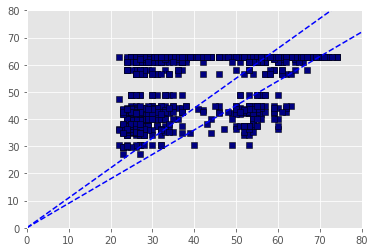

In [9]:
changepoints = pd.to_datetime('2012-4-1')
index_change = WeaOriTable[WeaOriTable.index<changepoints].shape[0]

X_train = X[:index_change].reshape(-1, 1)
y_train = y[:index_change].reshape(-1, 1)

print X_train
print y_train

Tr = np.append(X_train, y_train, axis=1)
print Tr


# preprocessing for zero mean and unit variance
Scaler_train = preprocessing.StandardScaler().fit(Tr)

Tr_std = Scaler_train.transform(Tr) 

X_test = X[index_change:].reshape(-1, 1)
y_test = y[index_change:].reshape(-1, 1)

print 'the count of row and cloumn for the training data are :', X_train.shape,y_train.shape
print 'the count of row and cloumn for the test data are :', X_test.shape,y_test.shape


print Scaler_train
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
 
y_rf = regr_rf.predict(X_test)
print y_rf
plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)

In [ ]:
# use the timestep of the weather data
# add feature to weather data
X = WeaOriTable['Temp'].values.reshape(-1, 1)
X = np.append(X,np.roll(X,-1),axis=1 )
X = np.append(X,np.roll(X[:,0].reshape(-1, 1),-2),axis=1 )
# print X

y = EnOriTable.loc[WeaOriTable.index]['value'].values.reshape(-1, 1)
# print y

changepoints = pd.to_datetime('2012-4-1')
index_change = WeaOriTable[WeaOriTable.index<changepoints].shape[0]
max_depth = 30

X_train = X[:index_change]
y_train = y[:index_change].reshape(-1, 1)

X_test = X[index_change:]
y_test = y[index_change:].reshape(-1, 1)

print 'the count of row and cloumn for the training data are :', X_train.shape,y_train.shape
print 'the count of row and cloumn for the test data are :', X_test.shape,y_test.shape
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
 
y_rf = regr_rf.predict(X_test)
print y_rf
plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
print r2_score(y_test,y_rf)
print mean_squared_error(y_test,y_rf)
print explained_variance_score(y_test,y_rf)

In [ ]:
# use the timestep of the weather data
# add feature to weather data
X = Wea5mTable['Temp'].values.reshape(-1, 1)
X = np.append(X,np.roll(X,-1),axis=1 )
X = np.append(X,np.roll(X[:,0].reshape(-1, 1),-2),axis=1 )
print X

y = EnOriTable.loc[Wea5mTable.index]['value'].values.reshape(-1, 1)
print y

changepoints = pd.to_datetime('2012-10-1')
index_change = Wea5mTable[Wea5mTable.index<changepoints].shape[0]
max_depth = 30

X_train = X[:index_change]
y_train = y[:index_change].reshape(-1, 1)

X_test = X[index_change:]
y_test = y[index_change:].reshape(-1, 1)

print 'the count of row and cloumn for the training data are :', X_train.shape,y_train.shape
print 'the count of row and cloumn for the test data are :', X_test.shape,y_test.shape
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
 
y_rf = regr_rf.predict(X_test)
print y_rf
plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
# print r2_score(y_test,y_rf)
# print mean_squared_error(y_test,y_rf)
# print explained_variance_score(y_test,y_rf)

In [ ]:
# DataFrame({'Column1':data[:,0],'Column2':data[:,1]})


# Data5m = pd.DataFrame( {
#     'LocalDateTime': EnOriTable.loc[Wea5mTable.index]['dttm_utc']
#     ,'EnergyConsumption':EnOriTable.loc[Wea5mTable.index]['value']
#     ,'OutsideDryBulbTemperature':Wea5mTable['Temp']
# })
Data5m = pd.concat([EnOriTable.loc[Wea5mTable.index]['dttm_utc']
                    ,EnOriTable.loc[Wea5mTable.index]['value']
                    ,Wea5mTable['Temp']]
                   ,axis=1, keys=['LocalDateTime', 'EnergyConsumption','OutsideDryBulbTemperature'])


Data5m.to_csv('D:/PYworks/MaveV20/mave/data/Data12_In5m.csv',index=False)

# Data5m.to_cvs('D:/PYworks/MaveV20/mave/data/Data12_In5m.csv',index=False, sep=',')

# DataFrame().reset_index(drop=True)

# concat([X['c'], df2['c']], axis=1, keys=['df1', 'df2'])

In [ ]:
changepoints = pd.to_datetime('2012-10-1')
index_change = Wea5mTable[Wea5mTable.index<changepoints].shape[0]
max_depth = 30

X_train = X[:index_change]
y_train = y[:index_change].reshape(-1, 1)

X_test = X[index_change:]
y_test = y[index_change:].reshape(-1, 1)

print 'the count of row and cloumn for the training data are :', X_train.shape,y_train.shape
print 'the count of row and cloumn for the test data are :', X_test.shape,y_test.shape
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
 
y_rf = regr_rf.predict(X_test)
print y_rf
plt.scatter(y_test, y_rf, edgecolor='k', c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])
# print r2_score(y_test,y_rf)
# print mean_squared_error(y_test,y_rf)
# print explained_variance_score(y_test,y_rf)

In [ ]:
WeaOriTable.asfreq(freq='30t')

In [ ]:
# aa = WeaOriTable.resample(rule='5T').asfreq().interpolate(method='linear')
aa = EnOriTable.resample(rule='3H',label='right',closed='right').asfreq()
aa.asfreq(freq='6H')
# aa = aa.drop(pd.Timestamp('2012-01-01 00:00:00'))
# bb = aa.resample(rule='6H',label='right',closed='left').asfreq()
# bb

In [ ]:
cc = EnOriTable.drop(['timestamp','estimated','anomaly'],axis=1)
cc['temp']=aa.Temp
cc.to_csv('D:/PYworks/MaveV20/mave/data/123.csv')
cc

In [ ]:
samples = 366*24*12
# samples
ClgSeason = pd.date_range('2012-01-01 0:05:00',periods = samples, freq = '5T')
ClgSeason=pd.to_datetime( ClgSeason,format = '%Y-%m-%d %H:%M' )
ClgSeason

In [ ]:
# add feature to weather data
X = WeaOriTable.loc[ClgSeason]['Temp'].values.reshape(-1, 1)
X = np.append(X,np.roll(X,-1),axis=1 )
X = np.append(X,np.roll(X[:,0].reshape(-1, 1),-2),axis=1 )
X

In [ ]:
y = EnOriTable.loc[ClgSeason]['value'].values
y

In [ ]:
dd.to_csv('D:/PYworks/MaveV20/mave/data/122.csv')
dd

In [ ]:
aa = EnOriTable.drop(EnOriTable.index[EnOriTable.index < '2012-01-01 03:00:00'])

bb = aa.resample('6H')
bb

In [ ]:
bb = aa.resample('6H')
bb

In [ ]:
new = EnOriTable.resample('3H')
new

In [ ]:
changepoints = pd.to_datetime('2012-6-30')
B = changepoints- ClgSeason[0]
print 'the number of training days is: ', B.days
index_change = B.days*4

max_depth = 30

X_train = X[:index_change]
y_train = y[:index_change].reshape(-1, 1)
X_test = X[(index_change+1):]
y_test = y[(index_change+1):].reshape(-1, 1)

print 'the count of row and cloumn are :', X_train.shape
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)
 
y_rf = regr_rf.predict(X_test)
print y_rf
plt.scatter(y_test, y_rf, edgecolor='k',
            c="navy", marker="s", label="Data")
line=np.linspace(0, 80, 100)
plt.plot(line,0.9 * line,'b--')
plt.plot(line,1.1 * line,'b--')
plt.xlim([0, 80])
plt.ylim([0, 80])

In [ ]:
WeaExtTable = WeaOriTable.resample(rule='30T').asfreq().interpolate(method='linear')
WeaExtTable

In [ ]:
R
# add feature to weather data
X = WeaOriTable.loc[ClgSeason]['Temp'].values.reshape(-1, 1)
X = np.append(X,np.roll(X,-1),axis=1 )
X = np.append(X,np.roll(X[:,0].reshape(-1, 1),-2),axis=1 )
X